# Introduction

Perkenalkan nama saya Fadhil Reza Maulana dan pada graded challenge 1 ini saya diberikan suatu dataframe mengenai jenis-jenis pokemon dan statistik dari id, penjelasan pokemon seperti type 1 dan 2 yang menjelaskan kelemahan dan ketahanan pokemon terhadap serangan, menjelaskan besarnya Hp yang mereka miliki, besar serangan, ketahan terhadap serangan, besar special attack dan defense mereka, kecepatan, generation dan legendary.

Objective yang ingin didapat dari dataset ini adalah :
1. Berhasil melakukan data cleaning seperti mencari data kosong yang kemudian di hilangkan maupun di isi dengan value tertentu
2. Melakukan eksplorasi data seperti melakukan query, menggroup data berdasarkan informasi-informasi dari setiap pokemon dan menampilkan suatu grafik sederhana

1. Import library yang akan digunakan yaitu numpy dan pandas

In [61]:
import numpy as np
import pandas as pd


# Data Cleaning

2a. Meloading dataframe dari file "pokemon.csv" yang disimpan dalam variabel "df"


In [62]:
df = pd.read_csv("pokemon.csv")

2b. Menampilkan isi variabel "df"

In [63]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


2c. Melihat informasi dataset seperti jumlah entries, banyaknya kolom, tipe data tiap kolom, besar penggunaan memory dengan ".info()"

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


2d. Mendeteksi dan menghitung jumlah missing value dari dataframe dengan .isnull().sum()

In [65]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Dideteksi terdapat 386 missing value dari kolom Type 2

2e. Mengcopy isi variabel "df" kedalam variabel lain dengan nama "df_new" untuk memudahkan proses cleaning dengan tidak mengubah isi variabel utama yaitu "df"

In [66]:
df_new = df.copy()

2f. Mengisi data kosong di kolom "Type 2" dengan value "unk", kemudian memeriksa kembali isi variabel df_new

In [67]:
df_new["Type 2"].fillna("unk.", inplace=True)

In [68]:
df_new

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,unk.,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [69]:
df_new.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

Varibel "df_new" sudah bersih dari missing value

4. Memasukan kembali isi variabel "df_new" ke variabel utama yaitu "df"

In [70]:
df = df_new

4.  Menghapus kolom dari variabel "df" yang tidak di pakai dalam analisis ini, yaitu kolom "Legendary",
    column"#" menjadi "id",
    column "Sp. Atk" menjadi "Sp_Atk", dan
    column "Sp.Def" menjadi "Sp.Def"
    column "Type 1" menjadi "Type_1"
    column "Type 2" menjadi "Type_2"

In [71]:
df = df.drop(["Legendary"], axis = 1).rename(columns={"#":"id", "Sp. Atk": "Sp_Atk", "Sp. Def":"Sp_Def", "Type 1":"Type_1", "Type 2":"Type_2"})

5. Pengecekan akhir isi variabel df

In [72]:
df

,id,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,unk.,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6


# Eksplorasi Data

### Query Data

6a. Menampilkan pokemon apa saja yang Type 1 nya adalah Grass , Type 2 nya adalah Poison dan besar HP lebih dari 60.

In [73]:
df[
    (df["Type_1"] == "Grass") & 
    (df["Type_2"] == "Poison") & 
    (df["HP"] >= 60)
]

,id,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
49,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1
76,70,Weepinbell,Grass,Poison,390,65,90,50,85,45,55,1
77,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1
452,407,Roserade,Grass,Poison,515,60,70,65,125,105,90,4
651,590,Foongus,Grass,Poison,294,69,55,45,55,55,15,5
652,591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5


6b. Menampilkan pokemon Generation 3 dengan Sp_Atk dan Sp_Def lebih besar sama dengan 90

In [74]:
df.query('Generation == 3 & Sp_Atk>= 90 & Sp_Def >=90')

,id,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3
295,272,Ludicolo,Water,Grass,480,80,70,70,90,100,70,3
305,282,Gardevoir,Psychic,Fairy,518,68,65,65,125,115,80,3
306,282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3
354,323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20,3
357,326,Grumpig,Psychic,unk.,470,80,45,65,90,110,80,3
366,334,AltariaMega Altaria,Dragon,Fairy,590,75,110,110,110,105,80,3
382,350,Milotic,Water,unk.,540,95,60,79,100,125,81,3
400,365,Walrein,Ice,Water,530,110,80,90,95,90,65,3
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3


6c. Menampilkan pokemon dengan Type_2 tidak diketahui atau "unk." dengan speed lebih dari 90 dan dengan pokemon generasi lebih dari sama dengan 3 

In [75]:
df[
    (df["Type_2"] == "unk.") &
    (df["Speed"] > 90) &
    (df["Generation"] >= 3)
]

,id,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
273,253,Grovyle,Grass,unk.,405,50,65,45,85,65,95,3
274,254,Sceptile,Grass,unk.,530,70,85,65,105,85,120,3
287,264,Linoone,Normal,unk.,420,78,70,61,50,61,100,3
313,289,Slaking,Normal,unk.,670,150,160,100,95,65,100,3
338,310,Manectric,Electric,unk.,475,70,75,60,105,60,105,3
339,310,ManectricMega Manectric,Electric,unk.,575,70,75,80,135,80,135,3
340,311,Plusle,Electric,unk.,405,60,50,40,85,75,95,3
341,312,Minun,Electric,unk.,405,60,40,50,75,85,95,3
393,359,AbsolMega Absol,Dark,unk.,565,65,150,60,115,60,115,3
397,362,GlalieMega Glalie,Ice,unk.,580,80,120,80,120,80,100,3


### Grouping and Aggregating

7a. Mengelompokan pokemon berdasarkan Generation dengan merata-ratakan HP, Attack dan Defense dari setiap Generation

In [76]:
df.groupby("Generation")["HP","Attack","Defense"].mean()

<ipython-input-76-db40126a2d21>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Generation")["HP","Attack","Defense"].mean()


,HP,Attack,Defense
Generation,,,
1,65.819277,76.638554,70.861446
2,71.207547,72.028302,73.386792
3,66.543750,81.625000,74.100000
4,73.082645,82.867769,78.132231
5,71.787879,82.066667,72.327273
6,68.268293,75.804878,76.682927


7b. Mengelompokan pokemon dengan Type_1 nya Normal dan Type_2 nya tidak di ketahui, kemudian di .groupby() berdasarkan Generation dengan melihat nilai max dari column Total setiap Generation

In [77]:
df[
    (df["Type_1"] == "Normal") &
    (df["Type_2"] == "unk.")
].groupby("Generation")["Total"].max()

Generation
1    590
2    540
3    670
4    720
5    500
6    472
Name: Total, dtype: int64

7c. Mengelompokan pokemon dengan Type_1 nya Grass, HP lebih dari sama dengan 70, di groupby() berdasarkan Generation dengan mencari nilai min dari column HP

In [78]:
df[
    (df["Type_1"] == "Grass") &
    (df["HP"] >= 70)
].groupby("Generation")["HP"].min()

Generation
1    75
2    75
3    70
4    70
5    70
6    88
Name: HP, dtype: int64

### Pandas Visualization

<AxesSubplot:>

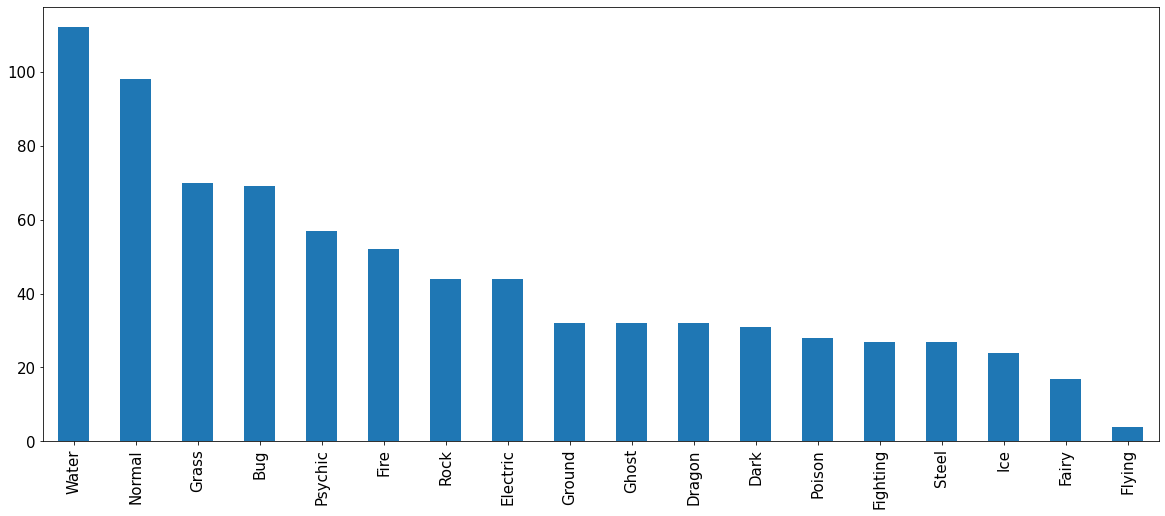

In [79]:
df["Type_1"].value_counts().plot(kind="bar", figsize=(20,8), fontsize=(15))

In [80]:
df

,id,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,unk.,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6


# Analisis

Dari proses analisis dataset Pokemon ini, dapat disimpulkan bahwa 